In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
print(cities)

['mahebourg', 'east london', 'leningradskiy', 'ponta delgada', 'tuggurt', 'rikitea', 'broome', 'hithadhoo', 'yeppoon', 'mys shmidta', 'puerto ayora', 'bintulu', 'georgetown', 'luganville', 'kalmunai', 'yumen', 'roald', 'nabire', 'punta arenas', 'kodiak', 'pangnirtung', 'pochutla', 'adrar', 'talnakh', 'goundam', 'ribeira grande', 'pevek', 'sovetskiy', 'mnisek pod brdy', 'kapaa', 'mogilno', 'kununurra', 'hermanus', 'kamenka', 'vaini', 'belushya guba', 'hilo', 'kaitangata', 'jalu', 'albany', 'madang', 'ushuaia', 'airai', 'marsaxlokk', 'buchanan', 'upernavik', 'hobart', 'narsaq', 'viedma', 'sao filipe', 'port hedland', 'solnechnyy', 'bengkulu', 'taolanaro', 'umzimvubu', 'rawson', 'aripuana', 'kato khorion', 'cidreira', 'lorengau', 'waiuku', 'baruun-urt', 'bairiki', 'yellowknife', 'beloha', 'carnarvon', 'cap malheureux', 'lebu', 'la romana', 'naples', 'busselton', 'college', 'mataura', 'pangody', 'kuche', 'debre tabor', 'hauterive', 'port alfred', 'yaan', 'avarua', 'provideniya', 'cape town

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#test
test_temperatures = []
test_url = url + "&q=toronto"

weather_test = requests.get(test_url)
weather_test_json = weather_test.json()
pprint(weather_test_json)

#temp2 = weather_test_json["main"]["temp_max"]
#test_temperatures.append(temp2)
#print(test_temperatures)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': -79.39},
 'dt': 1542074400,
 'id': 6167865,
 'main': {'humidity': 75,
          'pressure': 1023,
          'temp': 38.44,
          'temp_max': 41,
          'temp_min': 35.96},
 'name': 'Toronto',
 'sys': {'country': 'CA',
         'id': 3721,
         'message': 0.0043,
         'sunrise': 1542110951,
         'sunset': 1542146042,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 186.004, 'speed': 4.38}}


In [5]:
# pull through list of cities to pull data into dataframe
temperatures_max = []
humidity = []
wind_spd = []
clouds = []
lats = []

#for loop to run through cities in list
#add try error conditional incase of city not found
for city in cities:
    query_url = url + "&q=" + city
        
    try:
        #get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #get temperature from json response
        temp = weather_json["main"]["temp_max"]
        temperatures_max.append(temp)

        #get humidity from json response
        hum = weather_json["main"]["humidity"]
        humidity.append(hum)

        #get wind speed from json response
        spd = weather_json["wind"]["speed"]
        wind_spd.append(spd)

        #get cloudiness from json response
        clds = weather_json["clouds"]["all"]
        clouds.append(clds)
        
        #get latitude from json response
        lts = weather_json['coord']['lat']
        lats.append(lts)
        
    except KeyError:
        temperatures_max.append(0)
        humidity.append(0)
        wind_spd.append(0)
        clouds.append(0)
        lats.append(0)
        continue 



In [6]:
#check all data points pulled
print(str(len(temperatures_max)) + " " + str(len(clouds))+ " " + str(len(humidity))+ " " + str(len(wind_spd))+ " " + str(len(lats)))

610 610 610 610 610


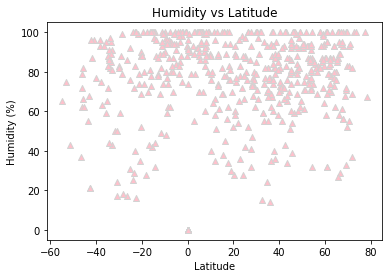

In [8]:

# create scatter plot for current temp versus latitude
#x = latitude
#y = weather

#scrub data to remove 0 latitude values and corresponding other values

x = lats
y = humidity

plt.scatter(x, y, marker = '^', c = 'pink', edgecolor = "lightgrey")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show

plt.savefig("Humidity.vs.Lat.png")

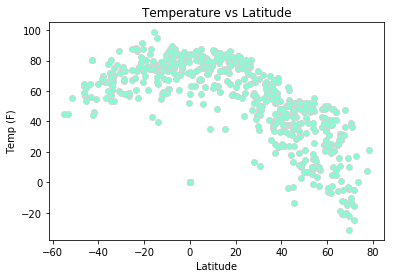

In [9]:
# create scatter plot for current humidity versus latitude
#x = latitude
#y = weather

x = lats
y = temperatures_max

plt.scatter(x, y, marker = 'o', c = 'aquamarine', edgecolor = "lightgrey")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")

plt.show

plt.savefig("Temp.vs.Lat.png")

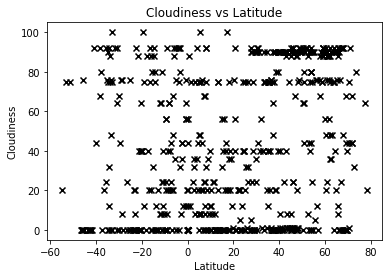

In [10]:

# create scatter plot for current cloudiness versus latitude
#x = latitude
#y = weather

#scrub data to remove 0 latitude values and corresponding other values

x = lats
y = clouds

plt.scatter(x, y, marker = 'x', c = 'black', edgecolor = "lightgrey")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show

plt.savefig("Clouds.vs.Lat.png")

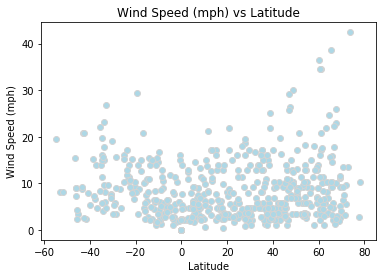

In [12]:
# create scatter plot for current wind speed versus latitude
#x = latitude
#y = weather

#scrub data to remove 0 latitude values and corresponding other values

x = lats
y = wind_spd

plt.scatter(x, y, marker = 'o', c = 'lightblue', edgecolor = "lightgrey")
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show

plt.savefig("Wind.vs.Lat.png")

In [ ]:
# Observations
# 1. There is no obvious correlation between cloudiness and a city's latitude
# 2. Temperature and Latitude have a very strong correlation, with average temeratures rising the closer they are to the equator
# 3. Since this is a sampling of cities, and not random latitudes, the data may be skewed based on chosen areas people are living
# Also, this is not taking temperature readings for any points directly in the ocean, since there are no permanent human settlements
# on the ocean. This data is primarily showing trends of weather and latitude as it relates to human developments, and not, necessarily
# the Earth as a whole. 